In [3]:
import csv
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt

In [102]:
class Perceptron(object):
    def __init__(self):
        self.W = None
        self.b = 0
        
    def load_data(self):
        with open('xor.dat','r') as f:
            data = [i.strip().split(',') for i in f.readlines()]
        data = np.array(data, dtype=np.float16)
        data = data.astype(int)
        return data    

    def hypothesis(self, X, w=None, b=None, SGD=False):
        if not SGD:
            w = w.reshape(self.W.shape)
            b = b.reshape(self.b.shape)
            f = np.dot(X,w) + b
        else:
            f = np.dot(X,self.W) + self.b
        f = np.exp(f)
        denom = f.sum(axis=1)
        for i in range(len(denom)):
            f[i,:] /= denom[i]
        return f
    
    def loss(self, p, y, w=None, lamb=0.9, SGD=False):        
        if SGD:
            return -1*(np.sum(y*np.log(p))/len(y)) + (lamb/2) * (np.sum(np.square(self.W)))
        else:
            return -1 * (np.sum(y*np.log(p))/len(y) + (lamb/2) * np.sum(np.square(w)))
    
    def secant_approx(self, x, y, epsilon=10e-3):
        w = self.W.flatten()
        b = self.b.flatten()
        theta = np.concatenate((w,b))
        delta_w_a = []
        
        for j in range(len(theta)):
#             backup = theta[j]
            theta[j] += epsilon
            p = self.hypothesis(x, w=theta[:-len(b)], b=theta[-len(b):])
            j_plus = self.loss(p, y, w=theta[:-len(b)])
#             theta[j] = backup
            theta[j] -= 2*epsilon
            p = self.hypothesis(x, w=theta[:-len(b)], b=theta[-len(b):])
            j_minus = self.loss(p, y, w=theta[:-len(b)])
            theta[j] += epsilon
            dj_dtheta = (j_plus - j_minus)/(2*epsilon)
            delta_w_a.append(dj_dtheta)
#             theta = backup            
        w = np.array(delta_w_a[:-len(b)]).reshape(self.W.shape)
        b = np.array(delta_w_a[-len(b):]).reshape(self.b.shape)
        return [w, b]
    
    def gradient(self, X, Y, step_size=0.8):
        p = self.hypothesis(X, SGD=True)
        J = self.loss(p, Y, SGD=True)
        
        dj_dw = np.dot(X.T, (p - Y)/len(X)) + (step_size * self.W)
        dj_db = sum(p-Y)/len(X)
        return [dj_dw, dj_db]

    def train(self, X, Y, step_size=0.01, epochs=20):
        print('Y:', Y)
        p = self.hypothesis(X, SGD=True)
        print('Initial P:', p)
        J = self.loss(p, Y, SGD=True)
        loss_per_epoch = []
        for index in range(epochs):            
            if J < 0.1:
                print('loss is minimum i.e.', J)
                break
            delta_a = self.gradient(X, Y)
            self.W -= step_size * delta_a[0]
            self.b -= step_size * delta_a[1]
#             p = self.hypothesis(X, SGD=True)
            J = self.loss(p, Y, SGD=True)
            loss_per_epoch.append(J)
        print('Final prediction:', p)
        correct = 0
        total = 0
        for i in range(len(p)):
            if np.argmax(Y[i]) == np.argmax(p[i]):
                correct += 1
            total += 1
        print('accuracy = ', (correct/total)*100)
        plt.plot(loss_per_epoch)
        plt.title('Losses per epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.plot()
    
    def compare(self):
        data = self.load_data()
        X, Y = data[:, :-1], data[:, -1]
        N, D = X.shape
        k = len(np.unique(Y))
        ind = np.zeros((N, k))
        for i in range(N):
            ind[i, Y[i]] = 1
        Y = ind
        X = X.astype(float)
        self.W = np.random.normal(scale=1/D**0.5, size=(D,k))
        self.b = np.random.normal(scale=1/k**0.5, size=k)
        print('W:', self.W)
        print('b:', self.b)
#         self.W = np.array([[-1.92207158, -0.99094], [-0.7629402, -0.1403664]])
#         self.b = np.array([0.34833396, -0.39948683])
        delta_a = self.gradient(X, Y)
        delta_n = self.secant_approx(X, Y)
        
        diff = delta_a[0]-delta_n[0]
        print('Difference between analytical and numerical Weights:\n',diff)
        for i in range(len(diff)):
            for j in range(len(diff[i])):
                if diff[i,j] > 1e-4:
                    print('not correct')
                    return
        diff = delta_a[1]-delta_n[1]
        print('Difference between analytical and numerical bias:\n',diff)
        for i in range(len(diff)):
            if diff[i] > 1e-4:
                print('not correct')
                return
        print('W:', self.W)
        print('b:', self.b)
        print('CORRECT')
        self.train(X,Y)

W: [[-1.58480352 -0.17151065]
 [-0.44616976 -0.29651584]]
b: [-0.397066    0.02003822]
Difference between analytical and numerical Weights:
 [[-2.69416668 -0.2915674 ]
 [-0.75848919 -0.50407633]]
Difference between analytical and numerical bias:
 [-1.16618003e-06  1.16618004e-06]
W: [[-1.58480352 -0.17151065]
 [-0.44616976 -0.29651584]]
b: [-0.397066    0.02003822]
CORRECT
Y: [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Initial P: [[0.39720989 0.60279011]
 [0.13819097 0.86180903]
 [0.3619852  0.6380148 ]
 [0.1213134  0.8786866 ]]
Final prediction: [[0.39720989 0.60279011]
 [0.13819097 0.86180903]
 [0.3619852  0.6380148 ]
 [0.1213134  0.8786866 ]]
accuracy =  50.0


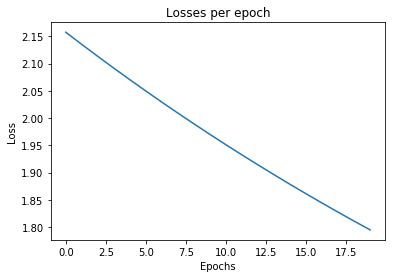

In [103]:
secant = Perceptron()
secant.compare()

W: [[-0.22843558 -0.36941605]
 [-0.12053073 -0.71491654]]
 <br />
b: [-0.48396139  0.4285822 ]

In [ ]:
[[ 0.0017977  -0.05448201]
 [-0.00092085 -0.06959175]]